IMPORT NECCESSARY LIBARIES

In [11]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

LOAD DATASET

In [54]:
dfr = pandas.read_csv("heart.csv")
dfr.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


DATA EXPLORATION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

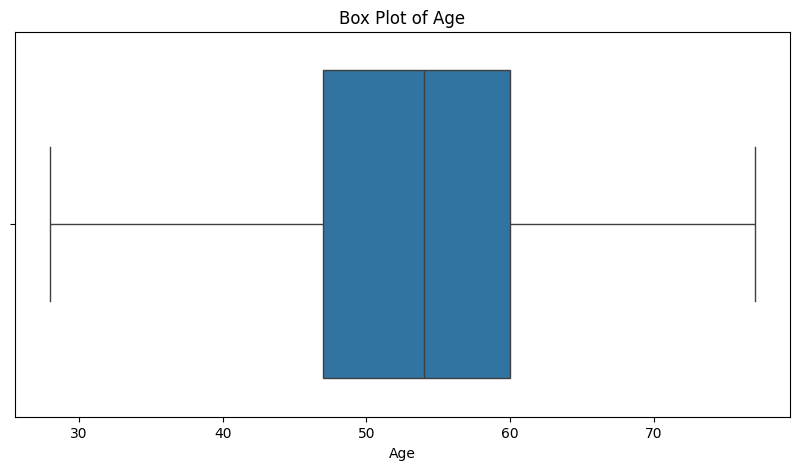

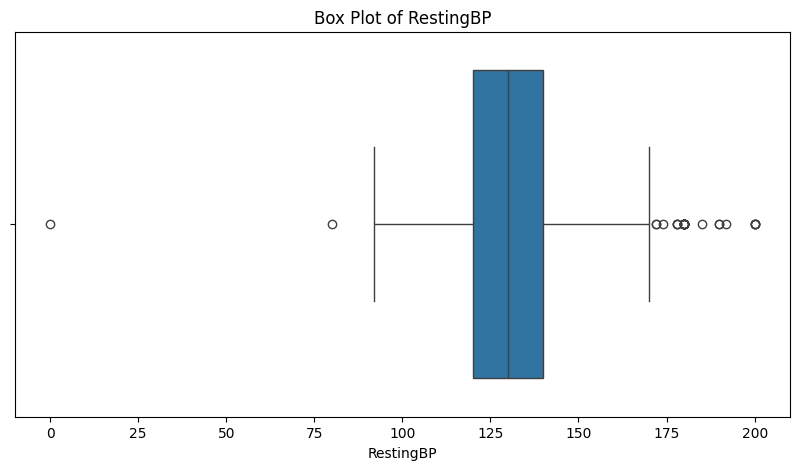

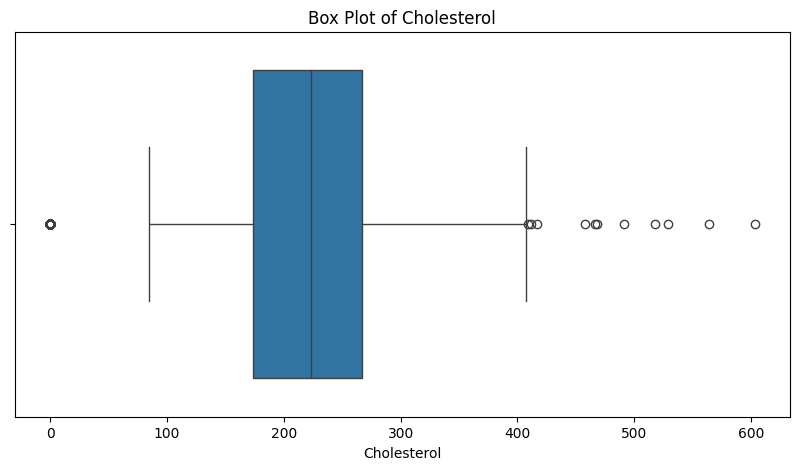

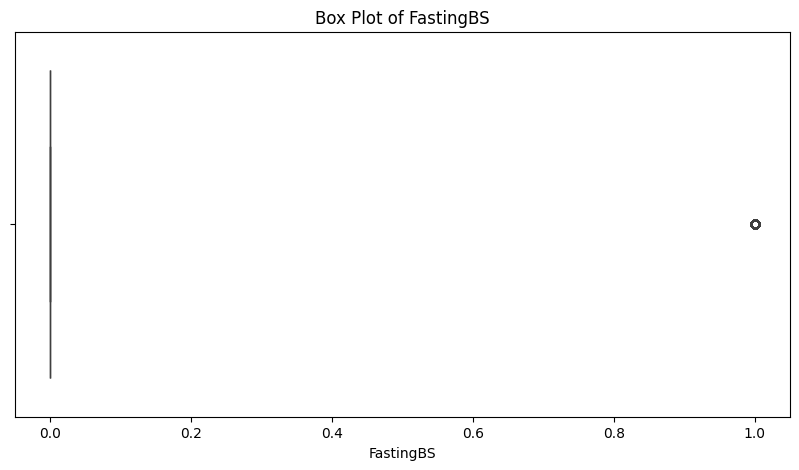

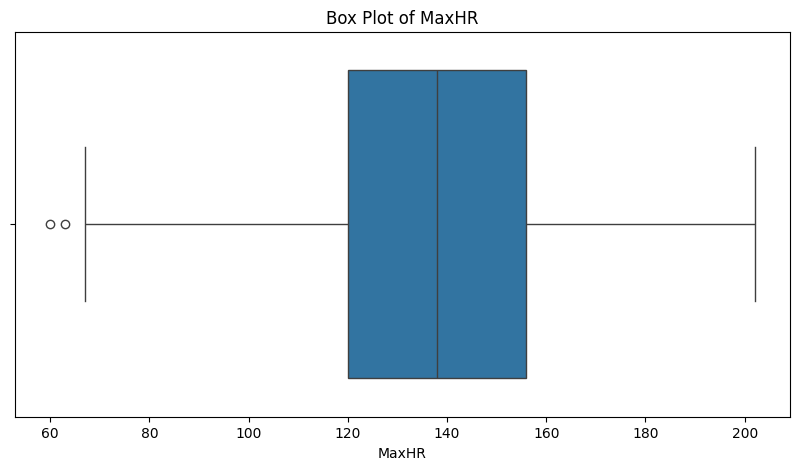

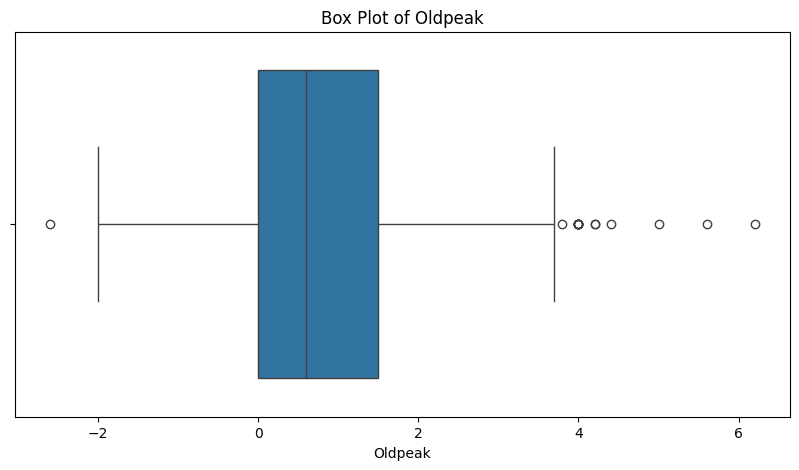

In [6]:
#checking for outliers
for column in df.drop(columns='HeartDisease').select_dtypes("number"):
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

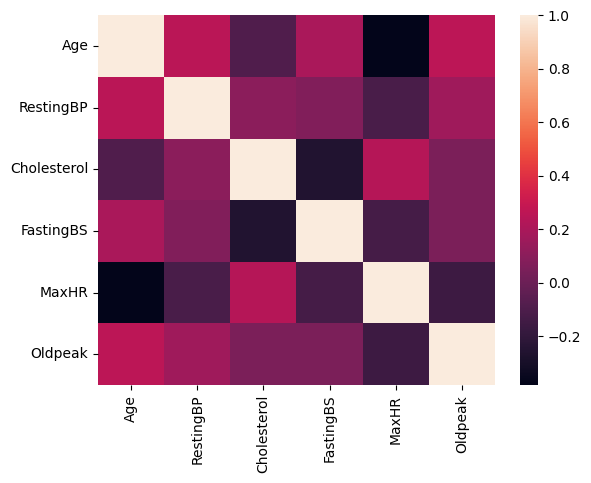

In [7]:
corr = df.drop(columns='HeartDisease').select_dtypes("number").corr()
sns.heatmap(corr);

In [8]:
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000


In [10]:
df.select_dtypes("object").nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

DATA TRANSFORMATION

In [12]:
categorical = df.select_dtypes("object")
label_encoders = {}  # Store LabelEncoders for each column

for column in categorical:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save the encoder for each column

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [15]:
#making an extra copy
df2 = pandas.concat([df, df])
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [17]:
corr2 = df.corr()
corr2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


<Axes: >

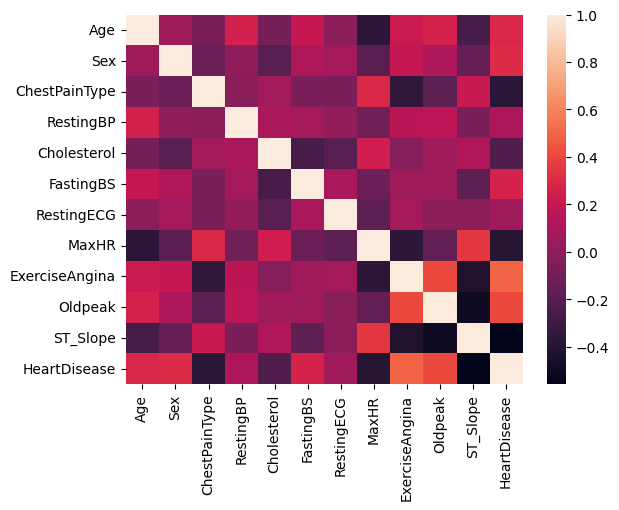

In [18]:
sns.heatmap(corr2)

In [21]:
#splitting the data into tarin and test data
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                   random_state =42)


918

In [25]:
len(X_test)

184

In [26]:
#setting the proportion of most occurence as baseline
baseline = df['HeartDisease'].value_counts(normalize=True).max()
print("Baseline Accuracy:", round(baseline, 3))

Baseline Accuracy: 0.553


MODEL BUILDING

LOGISTIC REGRESSION

In [28]:
#build model
model = LogisticRegression(max_iter=1000)
#fit model to trining data
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [29]:
#with leakage
train = model.score(X_train, y_train)
test =  model.score(X_test, y_test)
print("Training Accuracy:", round(train, 3))
print("Test Accuracy:", round(test, 3))

Training Accuracy: 0.862
Test Accuracy: 0.842


In [30]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)
print('Model Mean Val Score:', round(scores.mean(), 3))

[0.8707483  0.8707483  0.83673469 0.83673469 0.85616438]
Model Mean Val Score: 0.854


In [36]:
#without leakages
dff = df.drop(columns=["ExerciseAngina", "Oldpeak", "ST_Slope"])
target = "HeartDisease"
x2 = dff.drop(columns=target)
#target variable
y2 = dff[target]
#splitting the data into tarin and test data
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state =42)
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train2, y_train2)
train2 = model2.score(X_train2, y_train2)
test2 =  model2.score(X_test2, y_test2)
print("Training Accuracy:", round(train2, 3))
print("Test Accuracy:", round(test2, 3))
scores2 = cross_val_score(model2, X_train2, y_train2, cv=5)
print(scores2)
print('Model Mean Val Score:', round(scores2.mean(), 3))

Training Accuracy: 0.766
Test Accuracy: 0.788
[0.83673469 0.73469388 0.70748299 0.76870748 0.7260274 ]
Model Mean Val Score: 0.755


In [34]:
numb

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [33]:
numb = df2.select_dtypes("number")
scaler = StandardScaler()
scaler.fit_transform(numb)
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


RANDOM FOREST

In [38]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train2, y_train2)
train3 = model3.score(X_train2, y_train2)
test3 =  model3.score(X_test2, y_test2)
print("Training Accuracy:", round(train3, 3))
print("Test Accuracy:", round(test3, 3))
scores3 = cross_val_score(model3, X_train2, y_train2, cv=5)
print(scores3)
print('Model Mean Val Score:', round(scores3.mean(), 3))

Training Accuracy: 1.0
Test Accuracy: 0.804
[0.82312925 0.80952381 0.7755102  0.72108844 0.80136986]
Model Mean Val Score: 0.786


XGBOOST

In [40]:
model4 = XGBClassifier(n_estimators=100, random_state=42)
model4.fit(X_train2, y_train2)
train4 = model4.score(X_train2, y_train2)
test4 =  model4.score(X_test2, y_test2)
print("Training Accuracy:", round(train4, 3))
print("Test Accuracy:", round(test4, 3))
scores4 = cross_val_score(model4, X_train2, y_train2, cv=5)
print(scores4)
print('Model Mean Val Score:', round(scores4.mean(), 3))

Training Accuracy: 1.0
Test Accuracy: 0.772
[0.78231293 0.78231293 0.7755102  0.72789116 0.74657534]
Model Mean Val Score: 0.763


RANDOM SEARCH FOR RF & XGB

In [44]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [41]:
# Define hyperparameter grid
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": ["sqrt", "log2", None]
}

In [45]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Randomized Search
rf_random_search = RandomizedSearchCV(
    rf, rf_param_grid, n_iter=20, cv=5, scoring="accuracy", n_jobs=-1, random_state=42
)

# Fit the model
rf_random_search.fit(X_train2, y_train2)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [46]:
# Best Parameters & Score
print("Best RF Parameters:", rf_random_search.best_params_)
print("Best RF Score:", rf_random_search.best_score_)

Best RF Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Best RF Score: 0.7928990774391949


In [48]:
rf_test =  rf_random_search.score(X_test2, y_test2)
print("Test Accuracy:", round(rf_test, 3))

Test Accuracy: 0.793


In [49]:
# Define hyperparameter grid
xgb_param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

# Initialize the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Randomized Search
xgb_random_search = RandomizedSearchCV(
    xgb, xgb_param_grid, n_iter=20, cv=5, scoring="accuracy", n_jobs=-1, random_state=42
)

# Fit the model
xgb_random_search.fit(X_train2, y_train2)

# Best Parameters & Score
print("Best XGB Parameters:", xgb_random_search.best_params_)
print("Best XGB Score:", xgb_random_search.best_score_)

Best XGB Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best XGB Score: 0.7969993476842793


C:\Users\BABA\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:50:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [50]:
xg_test =  xgb_random_search.score(X_test2, y_test2)
print("Test Accuracy:", round(xg_test, 3))

Test Accuracy: 0.793


ENSEMBLE MODELS

In [51]:
from sklearn.ensemble import VotingClassifier

# Retrieve the best models from tuning
best_rf = rf_random_search.best_estimator_
best_xgb = xgb_random_search.best_estimator_

# Create Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[("RandomForest", best_rf), ("XGBoost", best_xgb)],
    voting="soft"  # Use "hard" for majority voting
)

# Train on the dataset
voting_clf.fit(X_train2, y_train2)

# Evaluate on test set
ensemble_test_pred = voting_clf.predict(X_test2)
ensemble_test_acc = accuracy_score(y_test2, ensemble_test_pred)

print("Ensemble Test Accuracy:", ensemble_test_acc)


C:\Users\BABA\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:57:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Test Accuracy: 0.7989130434782609


In [52]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_learners = [
    ("RandomForest", best_rf),
    ("XGBoost", best_xgb)
]

# Meta-learner: Logistic Regression
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train the stacked model
stacking_clf.fit(X_train2, y_train2)

# Evaluate on test set
stacking_test_pred = stacking_clf.predict(X_test2)
stacking_test_acc = accuracy_score(y_test2, stacking_test_pred)

print("Stacking Test Accuracy:", stacking_test_acc)


C:\Users\BABA\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:58:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\BABA\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:58:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\BABA\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:58:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Stacking Test Accuracy: 0.7934782608695652


In [53]:
import pickle

with open("heart_failure_prediction", "wb") as f:
    pickle.dump(rf_random_search, f)

In [57]:
import joblib
joblib.dump({"model": rf_random_search, "encoder": le}, "hearts_failure_prediction.pkl")
print("Model saved successfully!")

Model saved successfully!
